# Point Reactor Kinetics with Delayed Neutrons
This notebook solves the Point Kinetics Equations (PKE) using a 6-group delayed neutron model with the Runge-Kutta 4(5) method (RK45).
It models the transient behavior of reactor power and precursor concentrations following a step reactivity insertion.

In [13]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## Define Reactor Parameters
We use U-235 parameters for a typical PWR. These include the prompt neutron lifetime, delayed neutron group data, and step reactivity insertion.

In [14]:
# Reactor kinetics parameters
beta_total = 0.0065
Lambda = 1e-5  # prompt neutron lifetime [s]
lambdas = np.array([0.0124, 0.0305, 0.111, 0.301, 1.14, 3.01])
betas = np.array([0.00021, 0.00142, 0.00127, 0.00259, 0.00074, 0.00027])
rho = 0.003  # step reactivity insertion

## Define the PKE System
The point kinetics equations are defined as a system of ODEs to be solved by `solve_ivp`.

In [15]:
def pke_rhs(t, y, rho, beta_total, Lambda, betas, lambdas):
    n = y[0]
    C = y[1:]
    dn_dt = ((rho - beta_total) / Lambda) * n + np.sum(lambdas * C)
    dC_dt = (betas / Lambda) * n - lambdas * C
    return np.concatenate(([dn_dt], dC_dt))

## Initial Conditions and Solver Execution

In [16]:
n0 = 1.0
C0 = betas * n0 / (Lambda * lambdas)
y0 = np.concatenate(([n0], C0))
t_span = (0, 10.0)
t_eval = np.linspace(*t_span, 1000)

sol = solve_ivp(
    pke_rhs, t_span, y0, t_eval=t_eval, method='RK45',
    args=(rho, beta_total, Lambda, betas, lambdas)
)

## Plot Reactor Power

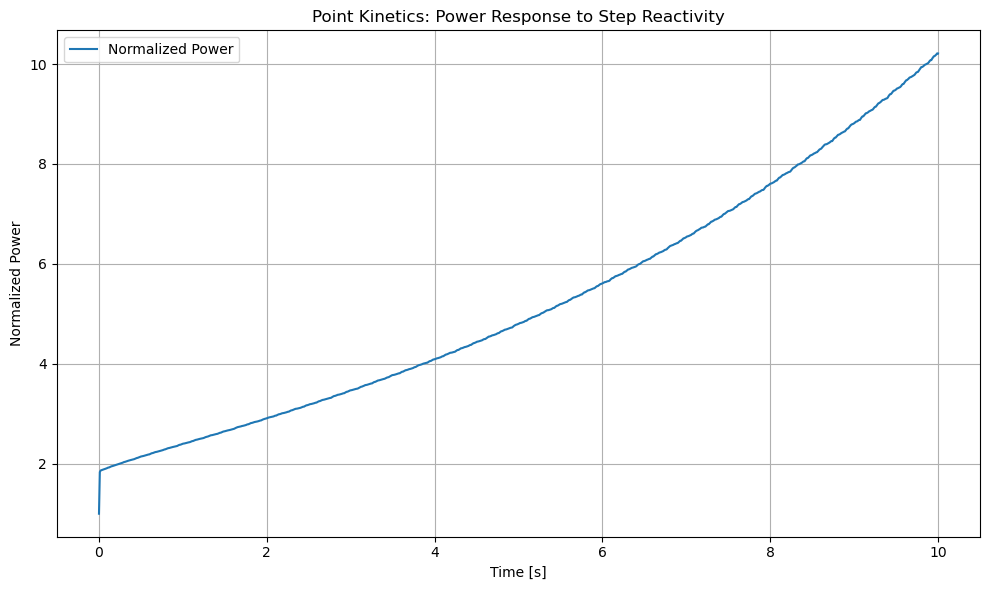

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label='Normalized Power')
plt.xlabel('Time [s]')
plt.ylabel('Normalized Power')
plt.title('Point Kinetics: Power Response to Step Reactivity')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Plot Delayed Neutron Precursor Concentrations

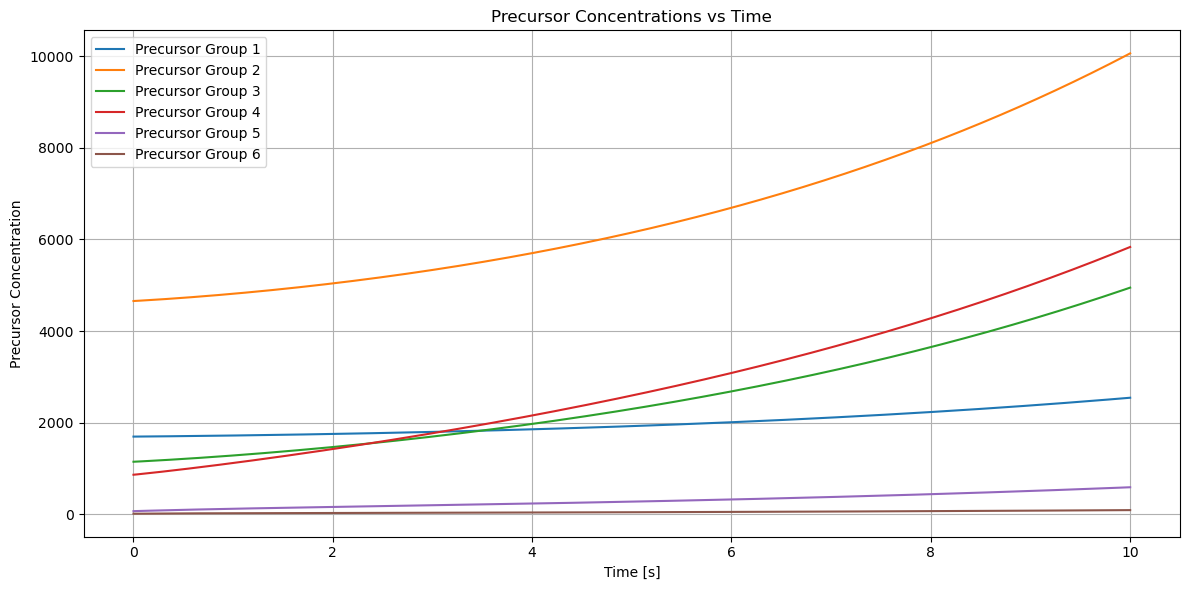

In [18]:
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.plot(sol.t, sol.y[i + 1], label=f'Precursor Group {i + 1}')
plt.xlabel('Time [s]')
plt.ylabel('Precursor Concentration')
plt.title('Precursor Concentrations vs Time')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()